# Лабораторная работа №3 (Методы спуска)
---
### Работу выполнили:
Обиджанов Алишер<br>
Кузнецов Павел<br>
Казаков Андрей<br>

**Дата:**

---
### 1) Градиентный спуск с постоянным шагом:
**Теория:**

$F(x_1, x_2, \dots, x_n) \rightarrow min$

Если функция $F$ диффернцируется, то задачу на минимум можно решать с помощью градиентных методов.

$\nabla F(x) =
\left(
    \begin{matrix}
    \frac{\partial F}{\partial x_1}\\
    \frac{\partial F}{\partial x_2}\\
    \dots\\
    \frac{\partial F}{\partial x_n}
    \end{matrix}
\right)$

$x^0=
\left(
    \begin{matrix}
    x^0_1\\
    \dots\\
    x^0_n
    \end{matrix}
\right) \qquad x^1= x^0-\nabla \alpha F(x^0) \qquad x^i=x^{i-1}-\nabla \alpha F(x^{i-1})$

$\alpha$ - скорость спуска, $\alpha > 0$ (Чем меньше $\alpha$, тем точнее шаг)

Для того, что бы найти шаг:

$\nabla F(x^1(\alpha)) \rightarrow \underset{\alpha}{min}$

$\alpha = arg\space\underset{\alpha}{min} \nabla F(x'(\alpha))$

**Реализуем пример в коде:**

<function matplotlib.pyplot.show(close=None, block=None)>

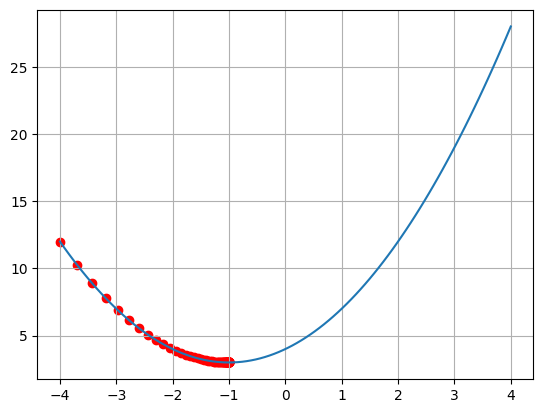

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#какая-то функция
def f(x):
    return (x+1)**2 + 3

def derivative(f, x):
    dx=1e-5
    return (f(x+dx)-f(x-dx))/(2*dx)

def grad(f, der, x0=None, iters=100, alpha=0.05):
    if(x0==None):
        x0=np.random.uniform(-5, 2)

    xk=x0
    arr_xk=np.array([x0])
    for i in range(iters-1):
        xk=xk-alpha*der(f, xk)
        arr_xk=np.append(arr_xk, xk)
    return arr_xk

x=np.linspace(-4, 4, 100)
y=np.array([f(a) for a in x])
px=grad(f, derivative, x0=-4, iters=100)
py=np.array([f(a) for a in px])

fig = plt.figure()
ax=fig.add_subplot()
ax.plot(x,y)
ax.scatter(px, py, color="red")
ax.grid()
plt.show

### Градиентный спуск с дроблением шага и условием Армихо

Рассматривается функция
$$\phi_k(\alpha):=f(x_k+ad_k)$$
Заметим, что
$$\phi_k(\alpha)=\nabla f(x_k+\alpha d_k)^T d_k$$
Поскольку d_k является направлением спуска, то $\phi'(0)=\nabla f(x_k)^T d_k <0$

**Условием Армихо** для $\alpha$ называется выполнение следующего неравенства:
$$\phi_k(\alpha) \le \phi_k(0) + c_1\alpha\phi'_k(0)$$
где $c_1 \in (0, 0.5)$ - некоторая константа

**Реализуем пример в коде:**